In [3]:
import numpy as np
import sympy as sp
import mpmath as mp
import math as mt
from matplotlib import pyplot as plt

In [63]:
def pointsGenerator(a : int,b : int, counter : int) -> list:
    step = (b - a) / counter
    points = [a] * counter
    for i in range(1,counter):
        points[i] = points[i - 1] + step
    points.append(b)
    return points

def getDots(solution : list, xs : list) -> list:
    fun = lambda i, x : (x ** i) * (1 - x ** 2)
    ans = []
    for i in xs:
        sum = 0
        for j in range(len(solution)):
            sum += (solution[j] * fun(j,i))
        ans.append([i,sum])
    return ans

def collocation(n : int, values : list, a : float, b : float, counter : int, func1 = 1, func2 = 1):
    system = []
    clist = [sp.Symbol('c' + str(i)) for i in range(n)]
    x = sp.Symbol('x')
    tmp = [clist[i] * (x ** i) * (1 - x ** 2) for i in range(n)]
    y1 = tmp[0]
    for i in range(1,n):
        y1 += tmp[i]
    y2 = y1.diff(x)
    eq = func1 * y2.diff(x) + (1 + func2 * x ** 2) * y1 + 1
    tmp = sp.lambdify(sp.Symbol('x'), eq, "sympy")
    for i in range(len(values)):
        system.append(tmp(values[i]))
    ans = sp.solve(system, clist)
    solution = [i for i in ans.values()]
    print(max(solution))
    points = pointsGenerator(a,b,counter)
    dots = getDots(solution,points)
    return dots

def galerkin(n : int, a : float, b : float, counter : int, func1 = 1, func2 = 1):
    system = []
    clist = [sp.Symbol('c' + str(i)) for i in range(n)]
    x = sp.Symbol('x')
    tmp = [clist[i] * (x ** i) * (1 - x ** 2) for i in range(n)]
    y1 = tmp[0]
    for i in range(1,n):
        y1 += tmp[i]
    y2 = y1.diff(x)
    eq = func1 * y2.diff(x) + (1 + func2 * x ** 2) * y1 + 1
    for i in range(n):
        system.append(sp.integrate(eq * (x ** i) * (1 - x ** 2),(x,a,b)))
    ans = sp.solve(system, clist)
    solution = [i for i in ans.values()]
    print(sp.Float(max(solution)))
    points = pointsGenerator(a,b,counter)
    dots = getDots(solution,points)
    return dots

def minSquares(n : int, a : float, b : float, func1 = 1, func2 = 1):
    system = []
    clist = [sp.Symbol('c' + str(i)) for i in range(n)]
    x = sp.Symbol('x')
    tmp = [clist[i] * (x ** i) * (1 - x ** 2) for i in range(n)]
    y1 = tmp[0]
    for i in range(1,n):
        y1 += tmp[i]
    y2 = y1.diff(x)
    eq = func1 * y2.diff(x) + (1 + func2 * x ** 2) * y1 + 1
    S = 0
    points = pointsGenerator(a,b,n + 1)
    tmp = sp.lambdify(sp.Symbol('x'), eq, "sympy")
    for i in range(n + 1):
        S += tmp(points[i]) ** 2
    R = []
    for i in range(n):
        cur = sp.Poly(S.diff(sp.Symbol('c' + str(i)))).coeffs()
        R.append(-(cur[-1]))
        cur.pop(-1)
        system.append(cur)
    R = np.array(R,dtype='float')
    L = np.array(system,dtype='float')
    solution = np.linalg.solve(L,R)
    print(max(solution))
    dots = getDots(solution,points)
    return dots
    

def draw(dots):
    p = np.array(dots)
    x,y = p.T
    plt.scatter(x,y)
    plt.plot(x,y,'-o')
    plt.show()

0.855825878147881


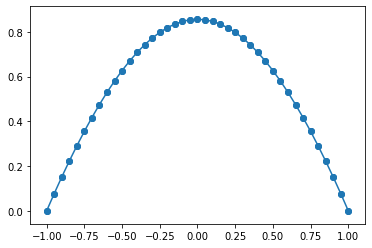

In [64]:
draw(collocation(5,[0.5,0.3,-0.3,0,-0.5],-1,1,40,mt.sin(8),mt.cos(8)))

0.930884740358291


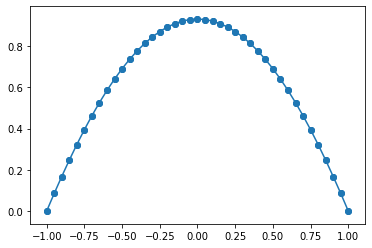

In [65]:
draw(collocation(5,[0.5,0.3,-0.3,0,-0.5],-1,1,40))

0.855523546324044


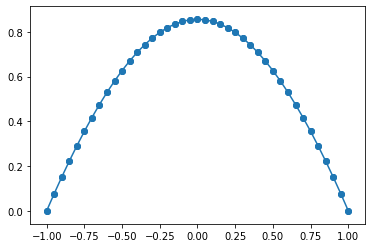

In [66]:
draw(galerkin(5,-1,1,40,mt.sin(8),mt.cos(8)))

0.932070363447680


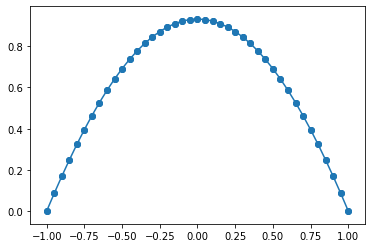

In [67]:
draw(galerkin(5,-1,1,40))

0.8555274819613441


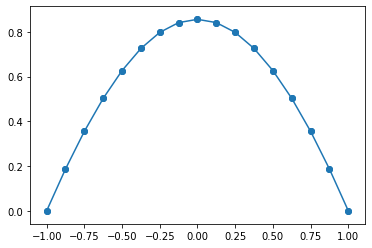

In [73]:
draw(minSquares(15,-1,1,mt.sin(8),mt.cos(8)))

0.9320537184314587


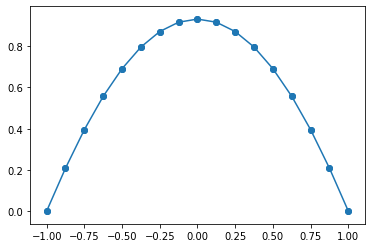

In [74]:
draw(minSquares(15,-1,1))